In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [212]:
train = pd.read_csv('_data/train.csv')
train.shape

(891, 12)

In [213]:
test = pd.read_csv('_data/test.csv')
test.shape

(418, 11)

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.apply(lambda x: sum(x.isnull()), axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
test.apply(lambda x: sum(x.isnull()), axis=0)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [14]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


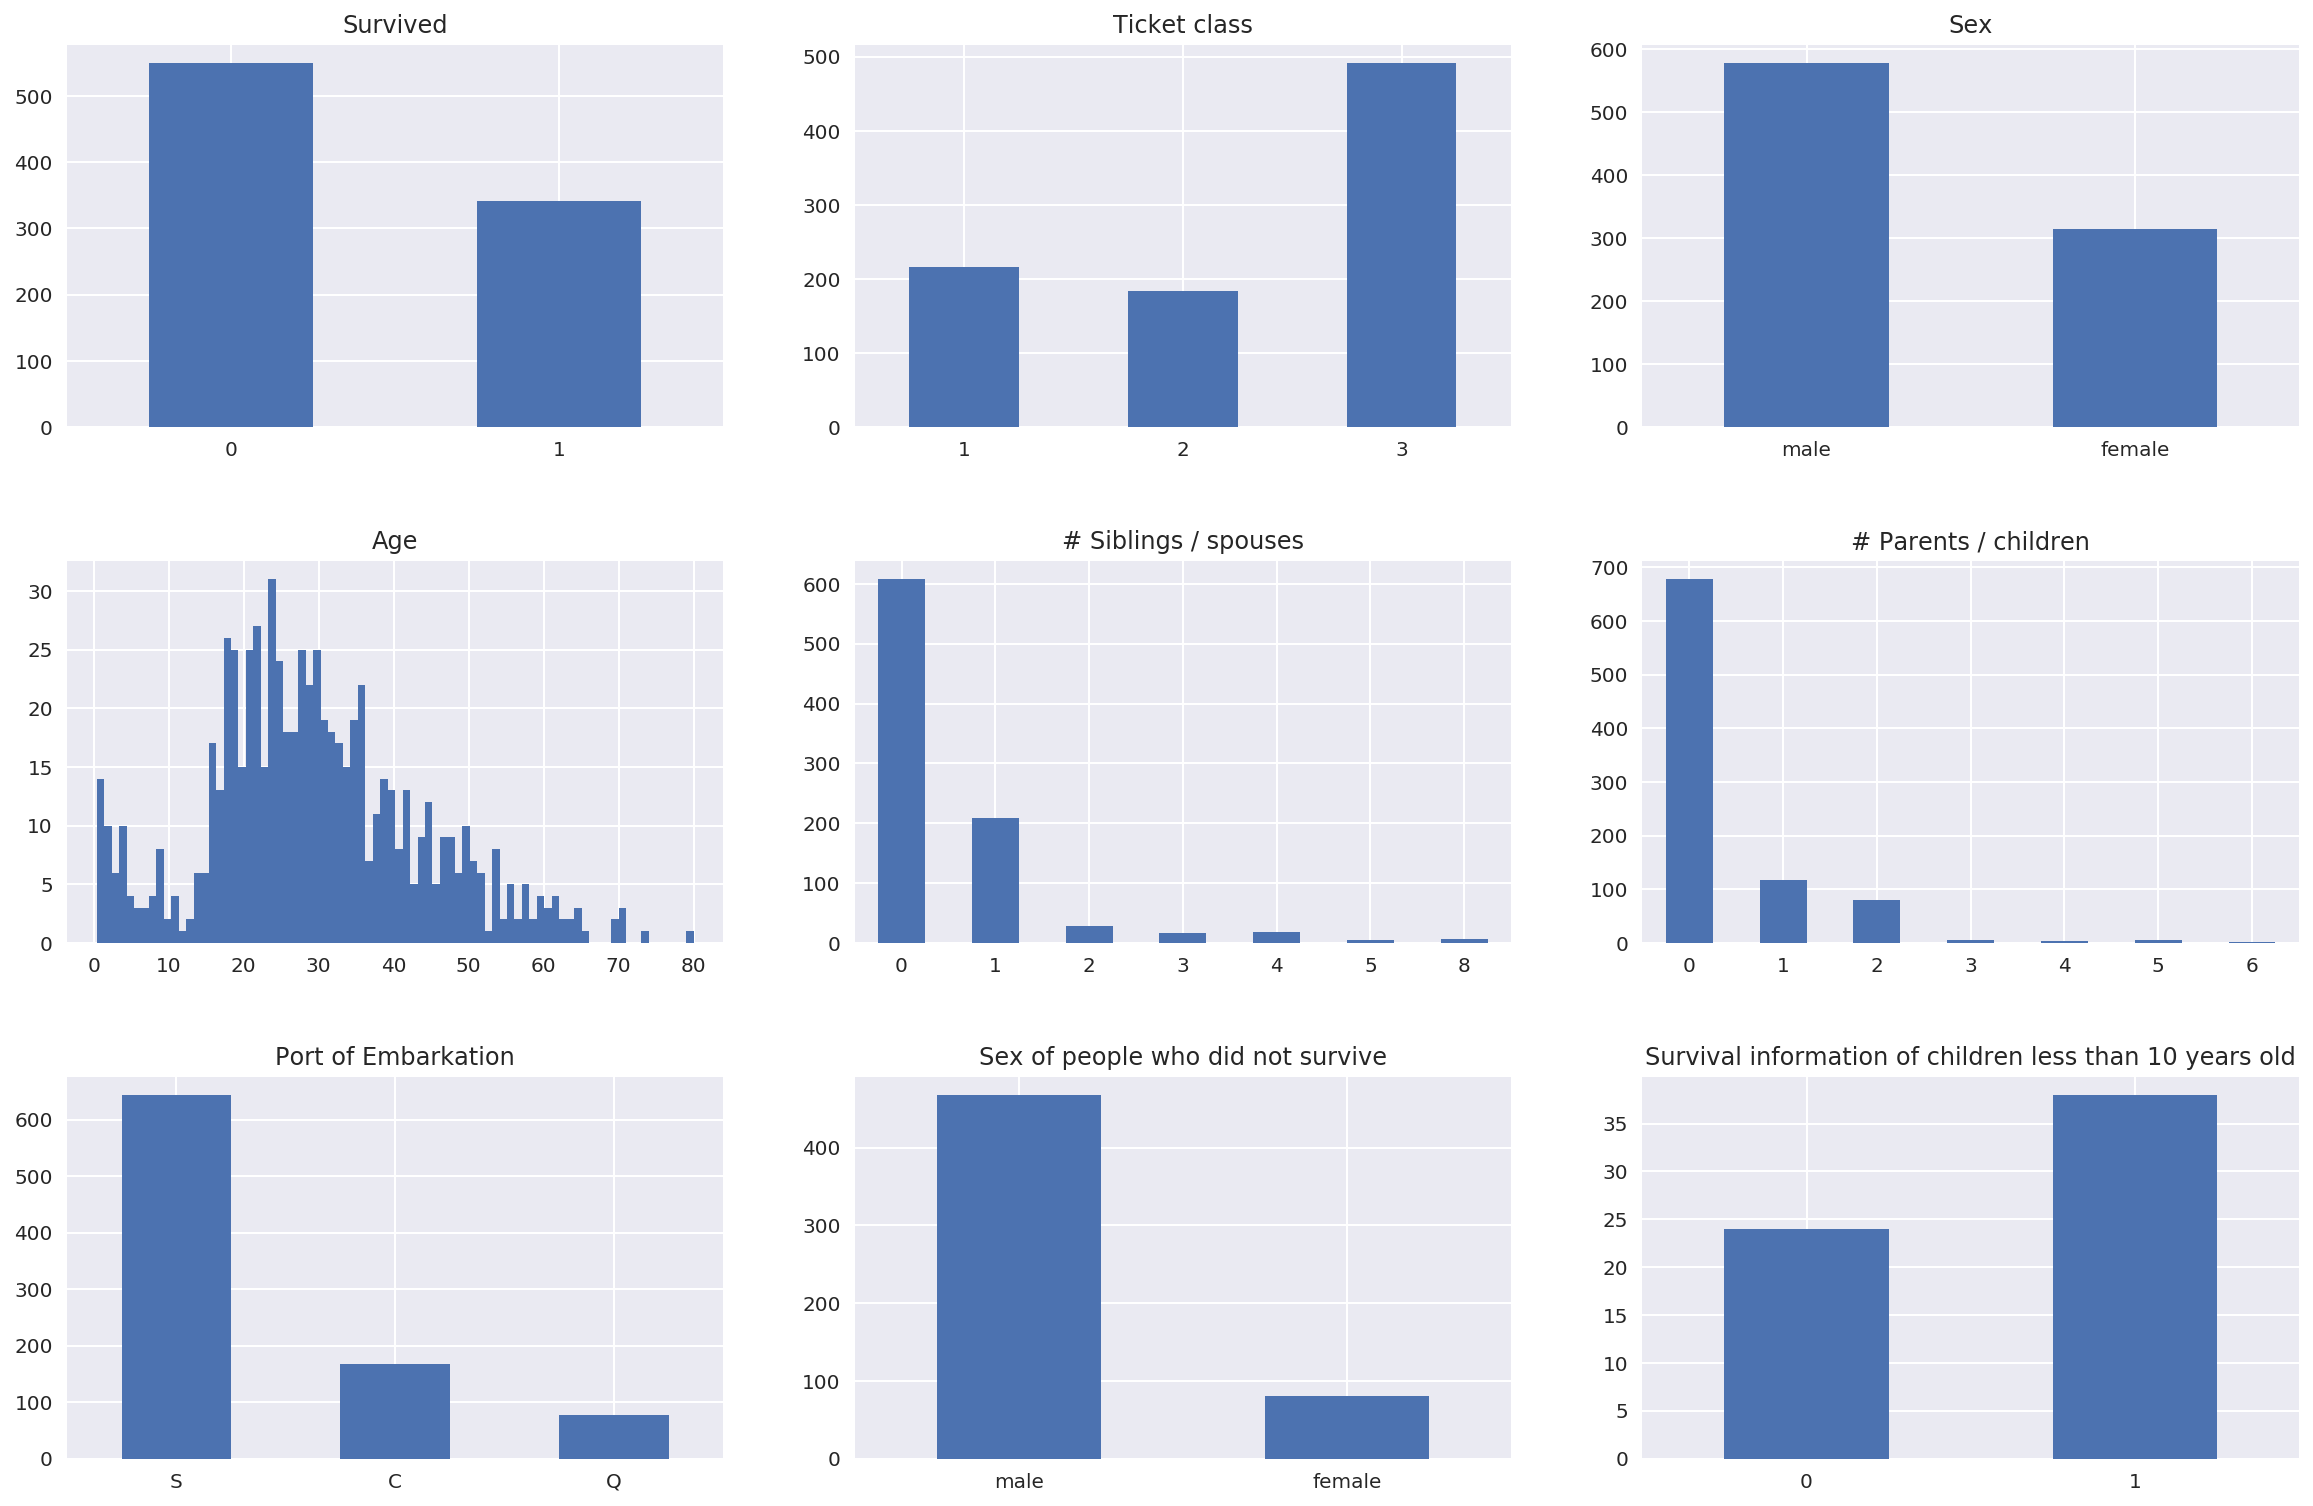

In [214]:
fig, axes = plt.subplots(3, 3, figsize=(20, 13))
fig.subplots_adjust(hspace=0.35)
train.Survived.value_counts().plot.bar(rot=0, ax=axes[0][0])
train.Pclass.value_counts().sort_index().plot.bar(rot=0, ax=axes[0][1])
train.Sex.value_counts().plot.bar(rot=0, ax=axes[0][2])
train.Age.hist(bins=80, ax=axes[1][0])
train.SibSp.value_counts().sort_index().plot.bar(rot=0, ax=axes[1][1])
train.Parch.value_counts().sort_index().plot.bar(rot=0, ax=axes[1][2])
train.Embarked.value_counts().plot.bar(rot=0, ax=axes[2][0])
train[train.Survived==0].Sex.value_counts().plot.bar(rot=0, ax=axes[2][1])
train[train.Age<10].Survived.value_counts().sort_index().plot.bar(rot=0, ax=axes[2][2])

axes[0][0].set_title('Survived')
axes[0][1].set_title('Ticket class')
axes[0][2].set_title('Sex')
axes[1][0].set_title('Age')
axes[1][1].set_title('# Siblings / spouses')
axes[1][2].set_title('# Parents / children')
axes[2][0].set_title('Port of Embarkation')
axes[2][1].set_title('Sex of people who did not survive')
axes[2][2].set_title('Survival information of children less than 10 years old')

## Missing values

In [43]:
from collections import Counter
counter = Counter([w for name in train.Name for w in name.split()])

In [44]:
counter.most_common(10)

[('Mr.', 517),
 ('Miss.', 182),
 ('Mrs.', 125),
 ('William', 62),
 ('John', 44),
 ('Master.', 40),
 ('Henry', 33),
 ('James', 24),
 ('Charles', 23),
 ('George', 22)]

In [55]:
Counter([w for name in train[train.Age<15].Name for w in name.split()]).most_common(10)

[('Miss.', 38),
 ('Master.', 36),
 ('Andersson,', 5),
 ('William', 5),
 ('Rice,', 4),
 ('Goodwin,', 4),
 ('Panula,', 4),
 ('Skoog,', 4),
 ('Palsson,', 3),
 ('Asplund,', 3)]

In [77]:
Counter([w for name in train[(train.Age<30) & (train.Age>15)].Name for w in name.split()]).most_common(10)

[('Mr.', 194),
 ('Miss.', 65),
 ('Mrs.', 35),
 ('William', 23),
 ('John', 15),
 ('Charles', 9),
 ('George', 7),
 ('Henry', 7),
 ('Alfred', 6),
 ('Sofia', 5)]

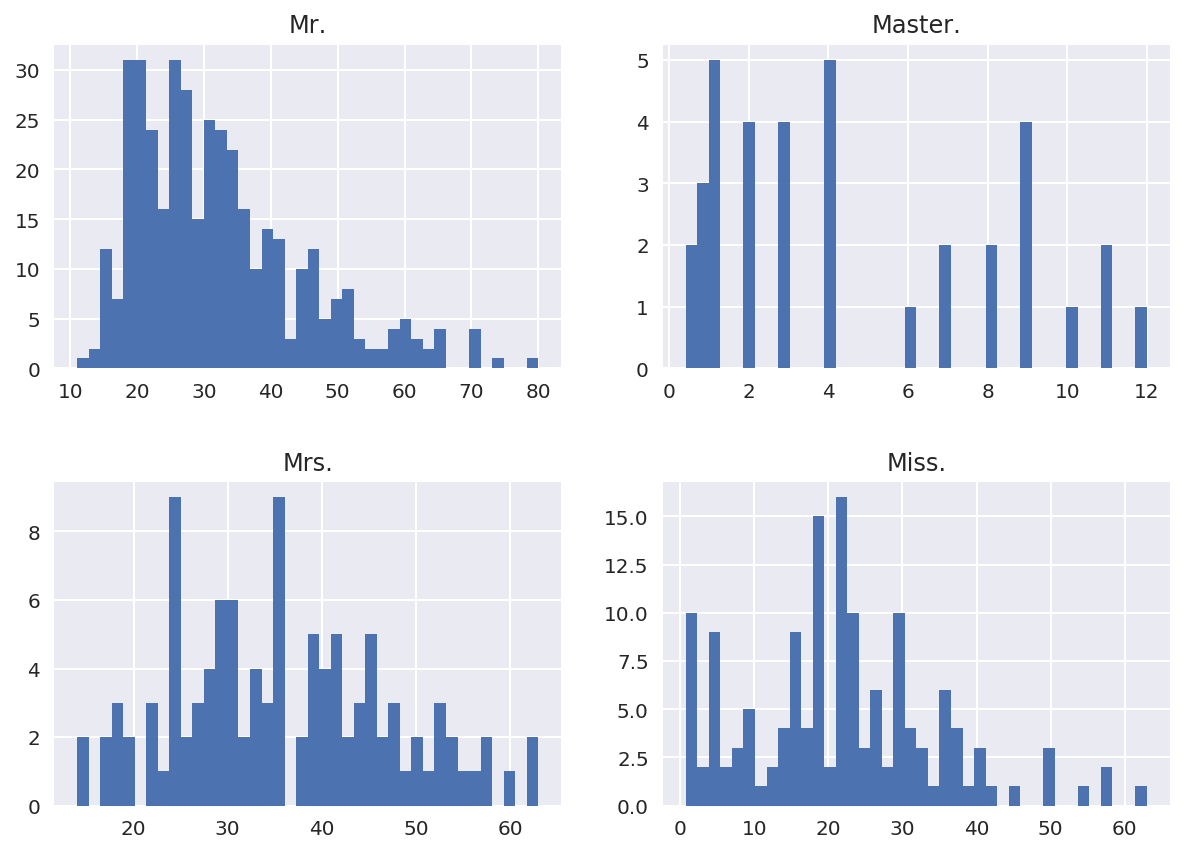

In [76]:
fig, axes = plt.subplots(2, 2, figsize=(10, 7))
fig.subplots_adjust(hspace=0.35)
train[train.Name.apply(lambda x: 'Mr.' in x)].Age.hist(bins=40, ax=axes[0][0])
train[train.Name.apply(lambda x: 'Master.' in x)].Age.hist(bins=40, ax=axes[0][1])
train[train.Name.apply(lambda x: 'Mrs.' in x)].Age.hist(bins=40, ax=axes[1][0])
train[train.Name.apply(lambda x: 'Miss.' in x)].Age.hist(bins=40, ax=axes[1][1])

axes[0][0].set_title('Mr.')
axes[0][1].set_title('Master.')
axes[1][0].set_title('Mrs.')
axes[1][1].set_title('Miss.')

In [95]:
age_df = pd.DataFrame(columns=['Title', 'Median', 'Mean'])
for title in ['Mr.', 'Master.', 'Mrs.', 'Miss.']:
    age = train[train.Name.apply(lambda x: title in x)].Age
    age_df.loc[len(age_df)] = [title, round(age.median()), round(age.mean(), 2)]
age_df = age_df.set_index('Title')
age_df

,Median,Mean
Title,,
Mr.,30,32.37
Master.,4,4.57
Mrs.,35,35.90
Miss.,21,21.77


In [96]:
train.apply(lambda x: sum(x.isnull()), axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [226]:
train = pd.read_csv('_data/train.csv')
test = pd.read_csv('_data/test.csv')

In [169]:
train[train.Age.isnull()].sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
552,553,0,3,"O'Brien, Mr. Timothy",male,NaN,0,0,330979,7.8292,NaN,Q
223,224,0,3,"Nenkoff, Mr. Christo",male,NaN,0,0,349234,7.8958,NaN,S
109,110,1,3,"Moran, Miss. Bertha",female,NaN,1,0,371110,24.1500,NaN,Q
457,458,1,1,"Kenyon, Mrs. Frederick R (Marion)",female,NaN,1,0,17464,51.8625,D21,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,NaN,S


In [190]:
for title in ['Mr.', 'Master.', 'Mrs.', 'Miss.']:
    idxs = train[train.Name.apply(lambda x: title in x)].index
    train.loc[idxs, 'Age'] = train.loc[idxs, 'Age'].fillna(age_df.loc[title, 'Median'])
    idxs = test[test.Name.apply(lambda x: title in x)].index
    test.loc[idxs, 'Age'] = test.loc[idxs, 'Age'].fillna(age_df.loc[title, 'Median'])

In [171]:
train.loc[[552, 223, 109, 457, 159]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
552,553,0,3,"O'Brien, Mr. Timothy",male,30.0,0,0,330979,7.8292,NaN,Q
223,224,0,3,"Nenkoff, Mr. Christo",male,30.0,0,0,349234,7.8958,NaN,S
109,110,1,3,"Moran, Miss. Bertha",female,21.0,1,0,371110,24.1500,NaN,Q
457,458,1,1,"Kenyon, Mrs. Frederick R (Marion)",female,35.0,1,0,17464,51.8625,D21,S
159,160,0,3,"Sage, Master. Thomas Henry",male,4.0,8,2,CA. 2343,69.5500,NaN,S


In [172]:
train[train.Age.isnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
766,767,0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6,NaN,C


In [173]:
test[test.Age.isnull()].head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
88,980,3,"O'Donoghue, Ms. Bridget",female,NaN,0,0,364856,7.75,NaN,Q


In [216]:
def create_age_df(df, titles):
    age_df = pd.DataFrame(columns=['Title', 'Median', 'Mean'])
    for title in titles:
        age = df[df.Name.apply(lambda x: title in x)].Age
        age_df.loc[len(age_df)] = [title, round(age.median()), round(age.mean(), 2)]
    age_df = age_df.set_index('Title')
    return age_df

In [217]:
titles = ['Mr.', 'Master.', 'Mrs.', 'Miss.', 'Dr.', 'Ms.']
age_df = create_age_df(train, titles)
age_df

,Median,Mean
Title,,
Mr.,30,32.37
Master.,4,4.57
Mrs.,35,35.90
Miss.,21,21.77
Dr.,46,42.00
Ms.,28,28.00


In [227]:
def fill_age(df, titles, age_df):
    for title in titles:
        idxs = df[df.Name.apply(lambda x: title in x)].index
        df.loc[idxs, 'Age'] = df.loc[idxs, 'Age'].fillna(age_df.loc[title, 'Median'])
    return df

In [228]:
train = fill_age(train, titles, age_df)
test = fill_age(test, titles, age_df)

In [202]:
train.apply(lambda x: sum(x.isnull()), axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [203]:
test.apply(lambda x: sum(x.isnull()), axis=0)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [229]:
train.Embarked.fillna(train.Embarked.mode()[0], inplace=True)
test.Fare.fillna(test.Fare.median(), inplace=True)

In [205]:
train.apply(lambda x: sum(x.isnull()), axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [206]:
test.apply(lambda x: sum(x.isnull()), axis=0)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [183]:
train.to_csv('_data/train_filled.csv', index=False)
test.to_csv('_data/test_filled.csv', index=False)

## Preprocessing

In [184]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [230]:
target_column = 'Survived'
id_column = 'PassengerId'
drop_columns = ['Name', 'Ticket', 'Cabin']
cat_columns = ['Sex', 'Embarked']
num_columns = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [231]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {col: LabelEncoder().fit(train[col]) for col in cat_columns}
for col in cat_columns:
    train[col] = label_encoders[col].transform(train[col])
    test[col] = label_encoders[col].transform(test[col])

In [232]:
for col in drop_columns:
    train.drop(col, axis=1, inplace=True)
    test.drop(col, axis=1, inplace=True)

In [233]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [234]:
train.to_csv('_data/train_preprocessed.csv', index=False)
test.to_csv('_data/test_preprocessed.csv', index=False)

## Modeling

In [235]:
from sklearn.tree import DecisionTreeClassifier

In [237]:
tree = DecisionTreeClassifier(max_depth=30)
tree.fit(train.drop([id_column, target_column], axis=1), train[target_column])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=30,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [238]:
predictions = tree.predict(train.drop([id_column, target_column], axis=1))

In [240]:
from sklearn.metrics import accuracy_score

In [241]:
accuracy_score(train[target_column], predictions)

0.978675645342312

## Submission

In [242]:
predictions = tree.predict(test.drop([id_column], axis=1))
submission = pd.DataFrame()
submission[id_column] = test[id_column]
submission[target_column] = predictions
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,1


In [243]:
submission.to_csv('_data/submission.csv', index=False)

## Random Forest

In [245]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [253]:
rf = RandomForestClassifier(n_estimators=300, n_jobs=-1, max_depth=30, class_weight='balanced')
score = cross_val_score(rf, train.drop([id_column, target_column], axis=1), train[target_column], 
                        n_jobs=-1, cv=5, verbose=2)
score

[CV]  ................................................................
[CV]  ................................................................
[CV] ................................................. , total=   1.5s
[CV]  ................................................................
[CV] ................................................. , total=   1.7s
[CV]  ................................................................
[CV] ................................................. , total=   1.4s
[CV]  ................................................................
[CV] ................................................. , total=   1.7s
[CV] ................................................. , total=   1.6s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.6s finished


array([ 0.7877095 ,  0.79888268,  0.84831461,  0.7752809 ,  0.82485876])

In [259]:
params={'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 100, 'oob_score': True, 'random_state': 0}
rf = RandomForestClassifier(**params)
score = cross_val_score(rf, train.drop([id_column, target_column], axis=1), train[target_column], 
                        n_jobs=-1, cv=5, verbose=2)
score

[CV]  ................................................................
[CV]  ................................................................
[CV] ................................................. , total=   0.6s
[CV]  ................................................................
[CV] ................................................. , total=   0.6s
[CV]  ................................................................
[CV] ................................................. , total=   0.4s
[CV]  ................................................................
[CV] ................................................. , total=   0.5s
[CV] ................................................. , total=   0.4s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.6s finished


array([ 0.81005587,  0.82122905,  0.84269663,  0.78651685,  0.83615819])

In [260]:
rf.fit(train.drop([id_column, target_column], axis=1), train[target_column])
predictions = rf.predict(train.drop([id_column, target_column], axis=1))
accuracy_score(train[target_column], predictions)

0.86756453423120095

In [261]:
predictions = rf.predict(test.drop([id_column], axis=1))
submission = pd.DataFrame()
submission[id_column] = test[id_column]
submission[target_column] = predictions
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [262]:
submission.to_csv('_data/rf_submission.csv', index=False)

<p align="center"><img src="https://i.imgur.com/s3pBdXe.png"/ width="70%"></p>